## Data Stream

#### Davy

In [1]:
# Reload local python files every 2 seconds
            
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import time

import numpy as np
import pandas as pd

from BruteForce import *
from MisraGries import *
from CountSketch import *
from CountMinSketch import *

import matplotlib.pyplot as plt

### Section 1: Brute Force Approach and Performance Evaluation

#### (A) Compute the average frequency of the news categories in the news stream.

In [3]:
# read data from "*.csv" file
path = "news_stream.csv"

if os.path.exists(path):
    print("loading file now...")
    data = pd.read_csv("news_stream.csv", header = None, sep=',')
else:
    print("The file does not exist.")

loading file now...


In [4]:
data

,0,1,2
0,0,U.S. NEWS,2022-09-23
1,1,U.S. NEWS,2022-09-23
2,2,COMEDY,2022-09-23
3,3,PARENTING,2022-09-23
4,4,U.S. NEWS,2022-09-22
...,...,...,...
209522,209522,TECH,2012-01-28
209523,209523,SPORTS,2012-01-28
209524,209524,SPORTS,2012-01-28
209525,209525,SPORTS,2012-01-28


In [5]:
#data reformatted into news_id , news_category and date
data = data.to_numpy()

news_id = data[:,0]
news_cate = data[:,1]
news_date = data[:,2]

In [6]:
news_id

array([0, 1, 2, ..., 209524, 209525, 209526], dtype=object)

In [7]:
news_cate

array(['U.S. NEWS', 'U.S. NEWS', 'COMEDY', ..., 'SPORTS', 'SPORTS',
       'SPORTS'], dtype=object)

In [8]:
news_date

array(['2022-09-23', '2022-09-23', '2022-09-23', ..., '2012-01-28',
       '2012-01-28', '2012-01-28'], dtype=object)

In [9]:
fre_dic = Brute_Force(news_cate)

In [10]:
print(f'The total number of news are {len(news_cate)}.')
print(f'The total categories of news are {len(fre_dic)}.')

The total number of news are 209527.
The total categories of news are 42.


In [11]:
avg_fre = len(news_cate) / len(fre_dic)
print(f'The average frequency of the news categories in the news stream is {round(avg_fre,4)}. ')

The average frequency of the news categories in the news stream is 4988.7381. 


####   (B) Compute the true frequencies of all categories. Please report the observed category distribution using a bar chart with frequencies in descending order. (**Note**: $x$-axis as categories, and $y$-axis as true frequency.)

In [12]:
#sorting the true frequency dictionary in descending

Sorted_fre_dic = dict(sorted(fre_dic.items(), key=lambda item: item[1], reverse=True))

In [13]:
Sorted_fre_dic

{'POLITICS': 35602,
 'WELLNESS': 17945,
 'ENTERTAINMENT': 17362,
 'TRAVEL': 9900,
 'STYLE & BEAUTY': 9814,
 'PARENTING': 8791,
 'HEALTHY LIVING': 6694,
 'QUEER VOICES': 6347,
 'FOOD & DRINK': 6340,
 'BUSINESS': 5992,
 'COMEDY': 5400,
 'SPORTS': 5077,
 'BLACK VOICES': 4583,
 'HOME & LIVING': 4320,
 'PARENTS': 3955,
 'THE WORLDPOST': 3664,
 'WEDDINGS': 3653,
 'WOMEN': 3572,
 'CRIME': 3562,
 'IMPACT': 3484,
 'DIVORCE': 3426,
 'WORLD NEWS': 3299,
 'MEDIA': 2944,
 'WEIRD NEWS': 2777,
 'GREEN': 2622,
 'WORLDPOST': 2579,
 'RELIGION': 2577,
 'STYLE': 2254,
 'SCIENCE': 2206,
 'TECH': 2104,
 'TASTE': 2096,
 'MONEY': 1756,
 'ARTS': 1509,
 'ENVIRONMENT': 1444,
 'FIFTY': 1401,
 'GOOD NEWS': 1398,
 'U.S. NEWS': 1377,
 'ARTS & CULTURE': 1339,
 'COLLEGE': 1144,
 'LATINO VOICES': 1130,
 'CULTURE & ARTS': 1074,
 'EDUCATION': 1014}

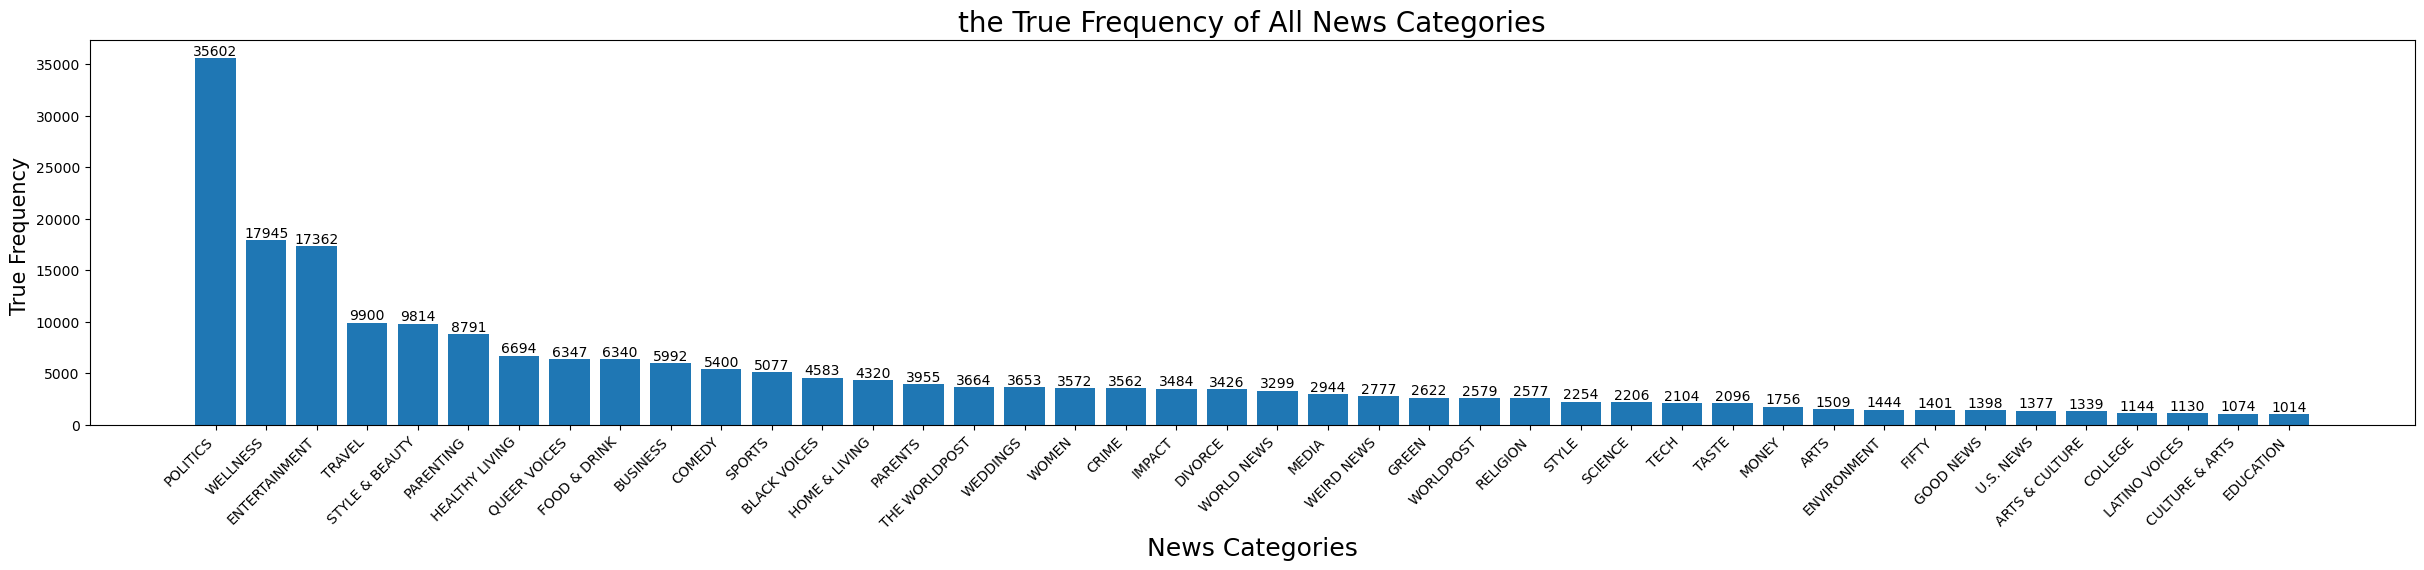

In [14]:
fig, ax = plt.subplots(figsize=(30, 5))

#The label on x-asix will rotate 45 degree
plt.xticks(rotation=45, ha='right') 

categories = list(Sorted_fre_dic.keys())
frequencies = list(Sorted_fre_dic.values())

plt.bar(categories,frequencies)

plt.xlabel('News Categories',size = 18)
plt.ylabel('True Frequency ',size = 15)
plt.title('the True Frequency of All News Categories',size = 20)

#show the true frequency value on the top of each bar
for i, value in enumerate(frequencies):
    plt.text(i, value + 1, str(frequencies[i]), ha='center', va='bottom')

plt.show()

##### Summary
Politics has the highest frequency, more than twice that of the second-highest category, wellness. Entertainment news and wellness have similar frequencies. On the other hand, education has the lowest frequency among the 42 categories represented in the chart. 

###   Section 2: Misra-Gries Approach and Performance Evaluation

####    (A) Implement Misra-Gries summary to find the most frequent categories. Please generate a plot of the estimated frequencies in descending order to observe the approximation skewness with a summary size of $k$ = 20.

In [15]:
#bucket size is 20, calculate the estimated frequency and decrement step
Mis_Gri_dic, decrements= Misra_Gries(news_cate, 20)

#sorting the estimated frequency dictionary by frequency in descending
Sorted_Mis_Gri_dic = dict(sorted(Mis_Gri_dic.items(), key=lambda item: item[1], reverse=True))

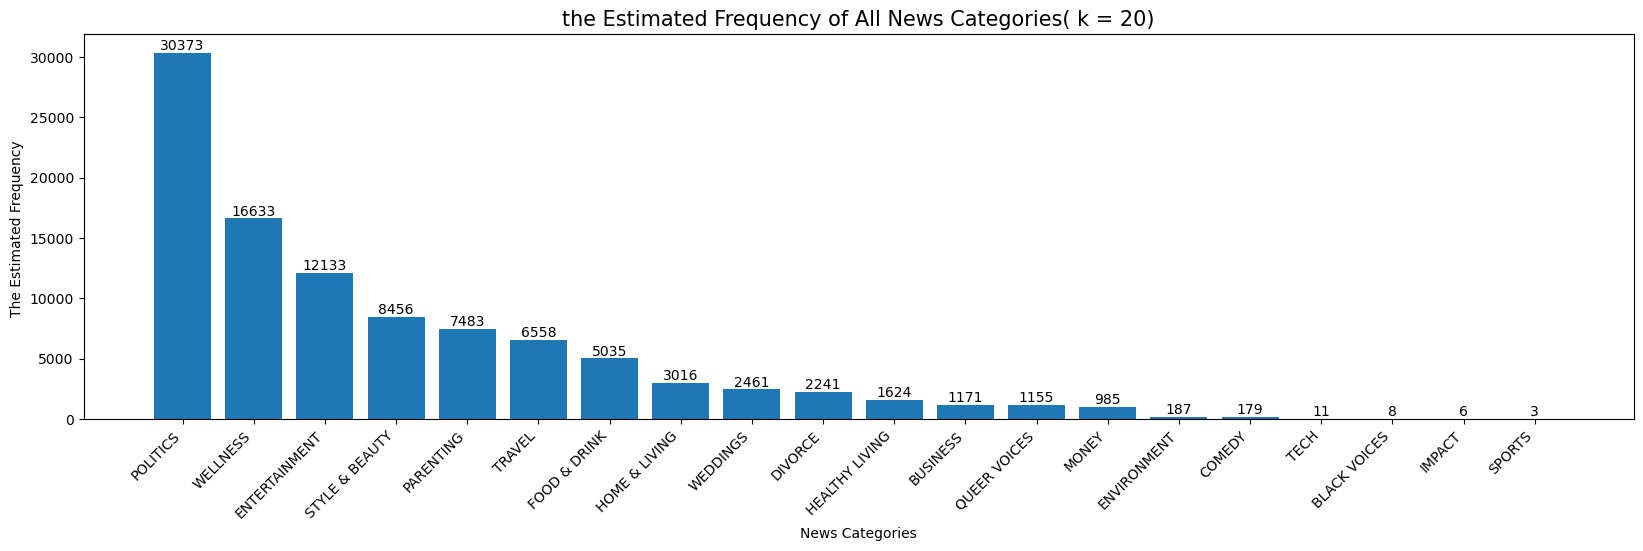

In [16]:
fig, ax = plt.subplots(figsize=(20, 5))

#The label on x-asix will rotate 45 degree
plt.xticks(rotation=45, ha='right')

categories_MG = list(Sorted_Mis_Gri_dic.keys())
frequencies_MG = list(Sorted_Mis_Gri_dic.values())

plt.bar(categories_MG,frequencies_MG)

plt.xlabel('News Categories')
plt.ylabel('The Estimated Frequency ')
plt.title('the Estimated Frequency of All News Categories( k = 20)',size = 15)

#show the estimated frequency value on the top of each bar
for i, value in enumerate(frequencies_MG):
    plt.text(i, value + 1, str(frequencies_MG[i]), ha='center', va='bottom')

plt.show()

##### Summary
The above bar chart shows a significant skewness, and all the 20 buckets are occupied. Politics has the highest estimated frequency. Wellness has the clear second-hightest estimated frequency than entertainment, while they have similar true frequency.

####   (B) Compare the estimated frequency of all categories from the generated Misra-Gries summary with their true frequencies from Q1(B). In particular, please provide a bar chart for all categories, displaying (1) the estimated frequencies by the Misra-Gries approach in descending order (with $k$ = 20), and (2) their corresponding true frequencies. (**Note**: $x$-axis as categories, $y$-axis as frequency, and two distributions.)

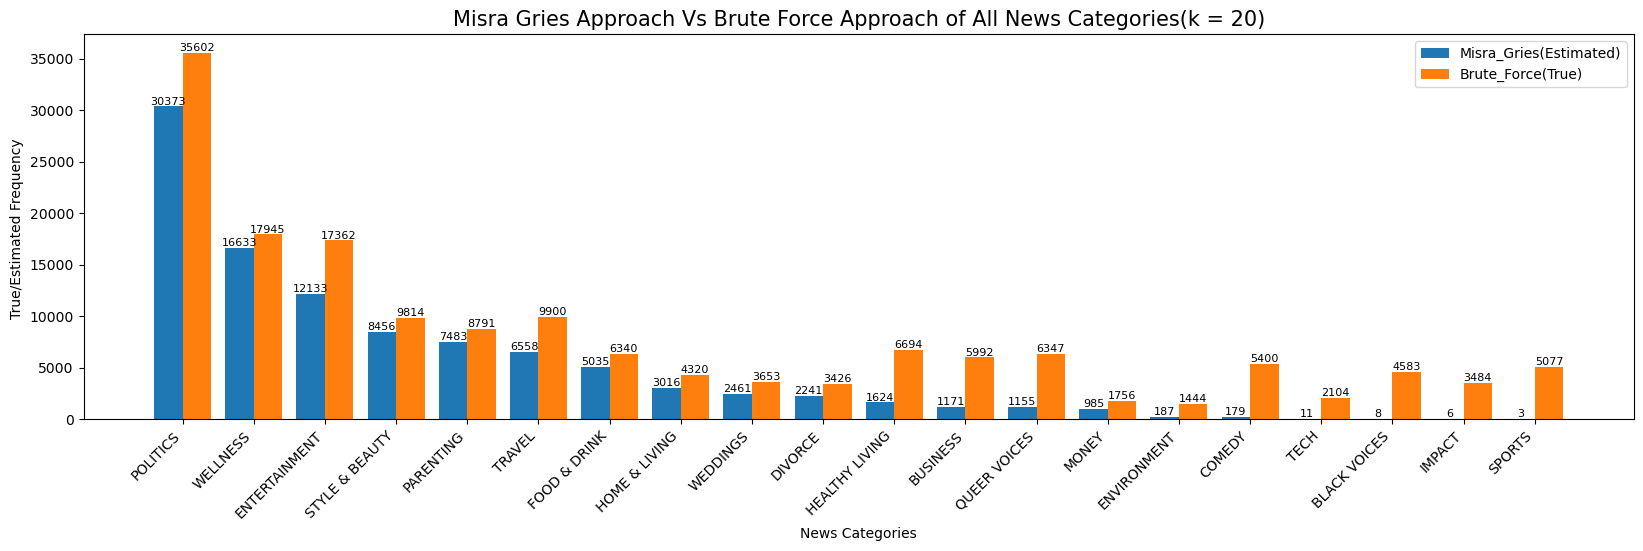

In [17]:
fig, ax = plt.subplots(figsize=(20, 5))

categories_MG = list(Sorted_Mis_Gri_dic.keys())
x_indices = np.arange(len(categories_MG))

plt.xticks(rotation = 45, ha = 'right')
plt.xticks(x_indices, categories_MG)

#use Misra Gries index to store the true the frequency for Brute Force Approach
MG = list(Sorted_Mis_Gri_dic.values())
BF = [Sorted_fre_dic[categories] for categories in categories_MG]

#adjust the bar chart, so that no overlap will be shown in the plot
plt.bar(x_indices - 0.2,MG,width=0.4,label = "Misra_Gries(Estimated)")
plt.bar(x_indices + 0.2,BF,width=0.4,label = "Brute_Force(True)")

plt.xlabel('News Categories')
plt.ylabel('True/Estimated Frequency ')
plt.title('Misra Gries Approach Vs Brute Force Approach of All News Categories(k = 20)',size = 15)

#show the estimated frequency value on the top of each bar
for i, value in enumerate(MG):
    plt.text(i - 0.2, value + 1, str(MG[i]), ha ='center', va ='bottom',size = 8)

for i, value in enumerate(BF):
    plt.text(i + 0.2, value + 1, str(BF[i]), ha ='center', va ='bottom',size = 8)

plt.legend()
plt.show()

##### Summary
The above plot shows the clear relationship between true frequency and estimated frequency of Misra Gries Approach, while the bucket is 20. It is expected that Miscra-Gries will undercount the frequency for all the categories. The true frequency and estimated frequency for the Money category are the closest among all of the 20 categories.   


#### (C) Run your Misra-Gries summary and report the actual number of decrement steps calculated by your Misra-Gries with $k$ = 20.

In [18]:
# decrement steps reported by the function
decrement_exact = decrements

In [19]:
# at most (m- m1)/(k+1) steps we will have under below parameters 
m = len(news_cate)
m1 = len(categories_MG)
k = 20

decrement_atmost = (m - m1)/( 20 + 1) 

In [20]:
print(f' The exact decrement steps count is {decrement_exact}, while the there is at most {round(decrement_atmost,4)} decrement steps.')

 The exact decrement steps count is 5229, while the there is at most 9976.5238 decrement steps.


####   (D) Investigate the impact of the size of summary $k$ ∈ $\{10, 20, 30, 40\}$ on the average relative error across all categories by Misra-Gries Approach. Please provide curve plot across varying summary size $k$, with $k$ as the $x$-axis and average absolute error of each news category ($c_i$) as the $y$-axis.
                                                         
<center> Absolute Error $(c_i) = \tilde{f}(c_i) − f(c_i)$ $\qquad$       (1)</center>                 

#### where $\tilde{f}(c_i)$ is the estimated frequency and $f(c_i)$ is the true frequency of category $c_i$.

In [21]:
def Abosolute_Error(tru_dic,ets_dic):

    a_err = 0
    not_recorded_ets_dic = {}

    #reported the the total number of categories
    size = len(tru_dic)
    
    All_the_keys = list(tru_dic.keys())
    recorded_keys = list(ets_dic.keys())

    #reported the keys which are not recorded the estimated frequency
    for key in All_the_keys:
        if key not in recorded_keys:
            not_recorded_ets_dic[ key ] = 0 

    #update the estimated frequency dictionary 
    ets_dic.update(not_recorded_ets_dic)
    

    #sorting the true and estimated dixtionary by category
    sorted_ets_dic = dict(sorted(ets_dic.items(), key=lambda item: item[0]))
    sorted_bru_dic = dict(sorted(tru_dic.items(), key=lambda item: item[0]))

    for key_bru, key_ets in zip (sorted_bru_dic, sorted_ets_dic):

        #absolute error = estimated frequency - true frequency
        a_err += ( sorted_ets_dic[key_ets] - sorted_bru_dic[key_bru] )
    
    avg_a_err = a_err / size 
    
    return avg_a_err

In [22]:
Mis_Gri_dic_10, decrements_10= Misra_Gries(news_cate, 10)

In [23]:

t10_start = time.time()
Mis_Gri_dic_10, decrements_10= Misra_Gries(news_cate, 10)
t10_end = time.time()

t20_start = time.time()
Mis_Gri_dic_20, decrements_20= Misra_Gries(news_cate, 20)
t20_end = time.time()

t30_start = time.time()
Mis_Gri_dic_30, decrements_30= Misra_Gries(news_cate, 30)
t30_end = time.time()

t40_start = time.time()
Mis_Gri_dic_40, decrements_40= Misra_Gries(news_cate, 40)
t40_end = time.time()

err_10=Abosolute_Error(fre_dic,Mis_Gri_dic_10)
err_20=Abosolute_Error(fre_dic,Mis_Gri_dic_20)
err_30=Abosolute_Error(fre_dic,Mis_Gri_dic_30)
err_40=Abosolute_Error(fre_dic,Mis_Gri_dic_40)

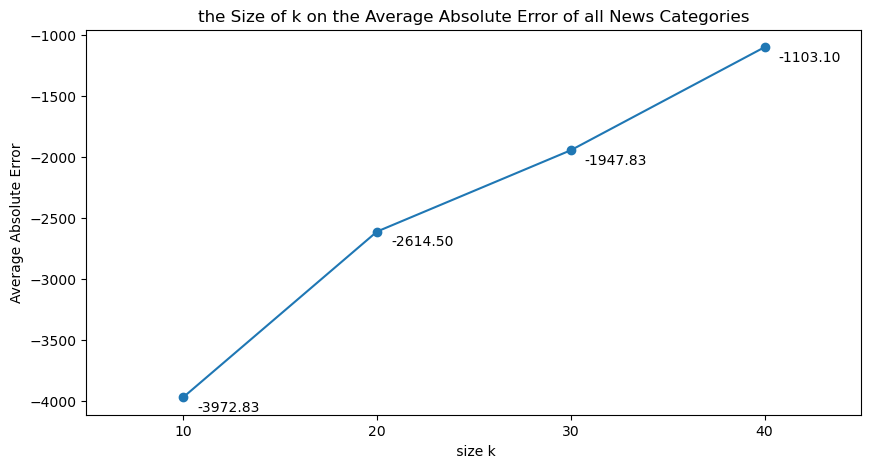

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
size = [ 10, 20, 30, 40] 
error = [err_10, err_20, err_30, err_40]

plt.plot(size, error, marker ='o')
plt.xticks(size)
plt.xlim(5,45)

for i, (xi,yi) in enumerate(zip(size, error)):
    plt.annotate(f'{yi:.2f}', (xi, yi),
                 textcoords="offset points", xytext=(10,-10), ha='left')

plt.xlabel(' size k')
plt.ylabel('Average Absolute Error')
plt.title('the Size of k on the Average Absolute Error of all News Categories')
plt.show()

##### Summary
The above plot shows the average absolute error is significantly impacted by bucket size k. All the absolute errors are negative value. Overall, the Misra-Gries Approach undercount the estimated frequency. While the bucket size increases, the absolute errors close to 0. The results are expected. 
**Hence, the Bucket size equals to 40 will be selected as the best accuracy group.**

#### (E) Investigate the impact of the size of summary $k ∈ \{10,20,30,40\}$ on the run-time by Misra-Gries Approach. Please provide curve plot across varying summary size $k$, with $k$ as the $x$-axis and run-time as the $y$-axis and comment how you would specify the value of $k$ to achieve more accurate estimations with lesser run-time.

In [25]:
# convert the program running time into milli-seconds
t_10 = (t10_end - t10_start) *1000
t_20 = (t20_end - t20_start) *1000
t_30 = (t30_end - t30_start) *1000
t_40 = (t40_end - t40_start) *1000

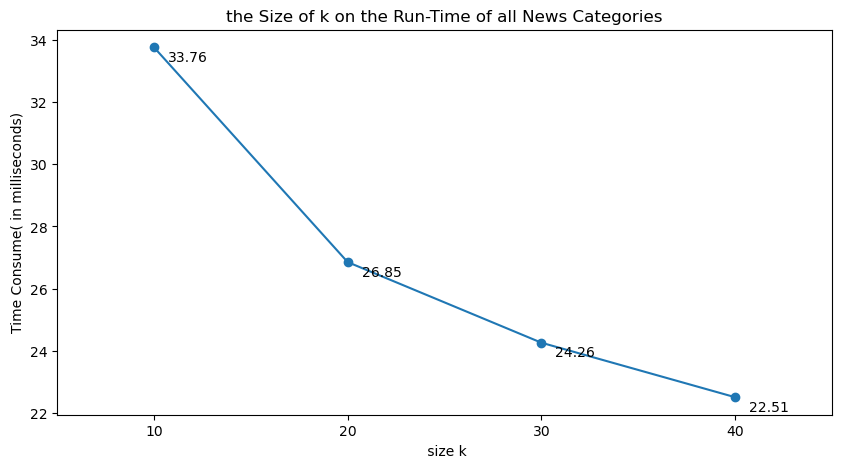

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))

time_consume = [ t_10, t_20, t_30, t_40 ]

plt.plot(size, time_consume, marker ='o')
plt.xticks(size)
plt.xlim(5,45)

for i, (xi,yi) in enumerate(zip(size, time_consume)):
    plt.annotate(f'{yi:.2f}', (xi, yi),
                 textcoords="offset points", xytext=(10,-10), ha='left')

plt.xlabel(' size k')
plt.ylabel('Time Consume( in milliseconds)')
plt.title('the Size of k on the Run-Time of all News Categories')
plt.show()

##### Summary 
The above plot shows the impact of bucket size k on running-time by Misra-Gries Approach. In my experient, while the bucket size increases, the running-time decreases.The total observations are more than 200,000. The running time does not have significant difference. Misra-Gries Approach under current situation has efficient performance. **Hence, the Bucket size equals to 40 will be selected as the best accuracy and least running-time group .**

### Section 3: Count Sketch Approach and Performance Evaluation


#### (A) Implement Count Sketch Algorithm to find the most frequent categories. Please report the plot of the estimated frequencies in descending order to observe the approximation skewness with a summary size of ($w$ = 20,$d$ = 4).

In [27]:
#convert the category into index by alphabetical order
cates = sorted(list(set(news_cate)))
indices = list(range(len(cates)))

#create the dictionary, the key is category and the value is index 
indices_dic = {string: index for string, index in zip(cates, indices)}

In [28]:
indices_dic

{'ARTS': 0,
 'ARTS & CULTURE': 1,
 'BLACK VOICES': 2,
 'BUSINESS': 3,
 'COLLEGE': 4,
 'COMEDY': 5,
 'CRIME': 6,
 'CULTURE & ARTS': 7,
 'DIVORCE': 8,
 'EDUCATION': 9,
 'ENTERTAINMENT': 10,
 'ENVIRONMENT': 11,
 'FIFTY': 12,
 'FOOD & DRINK': 13,
 'GOOD NEWS': 14,
 'GREEN': 15,
 'HEALTHY LIVING': 16,
 'HOME & LIVING': 17,
 'IMPACT': 18,
 'LATINO VOICES': 19,
 'MEDIA': 20,
 'MONEY': 21,
 'PARENTING': 22,
 'PARENTS': 23,
 'POLITICS': 24,
 'QUEER VOICES': 25,
 'RELIGION': 26,
 'SCIENCE': 27,
 'SPORTS': 28,
 'STYLE': 29,
 'STYLE & BEAUTY': 30,
 'TASTE': 31,
 'TECH': 32,
 'THE WORLDPOST': 33,
 'TRAVEL': 34,
 'U.S. NEWS': 35,
 'WEDDINGS': 36,
 'WEIRD NEWS': 37,
 'WELLNESS': 38,
 'WOMEN': 39,
 'WORLD NEWS': 40,
 'WORLDPOST': 41}

In [29]:
#get the category dictionary index
news_indices = [indices_dic[item] for item in news_cate]

#estimated frequency calculated by count sketch approach
cs_fre= Count_Sketch(news_indices, 20, 4)

#connect the category with corresponding estimated frequency
Cou_Ske_fre = dict(zip(list(indices_dic.keys()),cs_fre))

#sort the etmimated frequency by descending order
Sorted_Cou_Ske_fre = dict(sorted(Cou_Ske_fre.items(), key=lambda item: item[1],reverse = True))

Generated Prime Number are: 661575331 and 831599669.


20 is the bucket size of Count Sketch Approach.


4 independent hash function(h) will be generated.

((567460732 * x + 539228280) mod 661575331) mod 20
((475908784 * x + 403544825) mod 661575331) mod 20
((650580598 * x + 628487915) mod 661575331) mod 20
((14859288 * x + 31780696) mod 661575331) mod 20

4 independent 2-wise sign function(s) will be generated.

((165708938 * x + 757656543) mod 831599669) mod 2
((781975640 * x + 693359147) mod 831599669) mod 2
((254090956 * x + 76055629) mod 831599669) mod 2
((434566124 * x + 195638989) mod 831599669) mod 2

We are generating the hash table...

The hash table has been generated successfully.

The estimated frequency for all of the items has been generated successfully.



In [30]:
Sorted_Cou_Ske_fre

{'POLITICS': 38005.5,
 'COLLEGE': 27626.0,
 'ENTERTAINMENT': 20738.0,
 'WELLNESS': 19450.5,
 'STYLE & BEAUTY': 17300.0,
 'PARENTING': 14881.0,
 'IMPACT': 13718.0,
 'TRAVEL': 12248.5,
 'LATINO VOICES': 11267.0,
 'WORLD NEWS': 10475.5,
 'SPORTS': 9713.0,
 'BLACK VOICES': 9700.5,
 'DIVORCE': 9413.0,
 'FOOD & DRINK': 9378.5,
 'HOME & LIVING': 8710.0,
 'PARENTS': 8702.0,
 'QUEER VOICES': 8564.0,
 'WOMEN': 8330.0,
 'THE WORLDPOST': 7517.0,
 'WEIRD NEWS': 7475.5,
 'BUSINESS': 6692.5,
 'CULTURE & ARTS': 6016.5,
 'ARTS': 5539.0,
 'TECH': 5481.0,
 'EDUCATION': 4637.5,
 'ENVIRONMENT': 4491.0,
 'MONEY': 4403.0,
 'STYLE': 4050.0,
 'WORLDPOST': 4010.5,
 'COMEDY': 3962.0,
 'GREEN': 3681.5,
 'CRIME': 3028.0,
 'HEALTHY LIVING': 2231.0,
 'RELIGION': 2228.5,
 'MEDIA': 2042.5,
 'GOOD NEWS': 1895.0,
 'WEDDINGS': 1200.5,
 'ARTS & CULTURE': 116.0,
 'SCIENCE': -875.0,
 'TASTE': -920.5,
 'U.S. NEWS': -1727.5,
 'FIFTY': -6164.5}

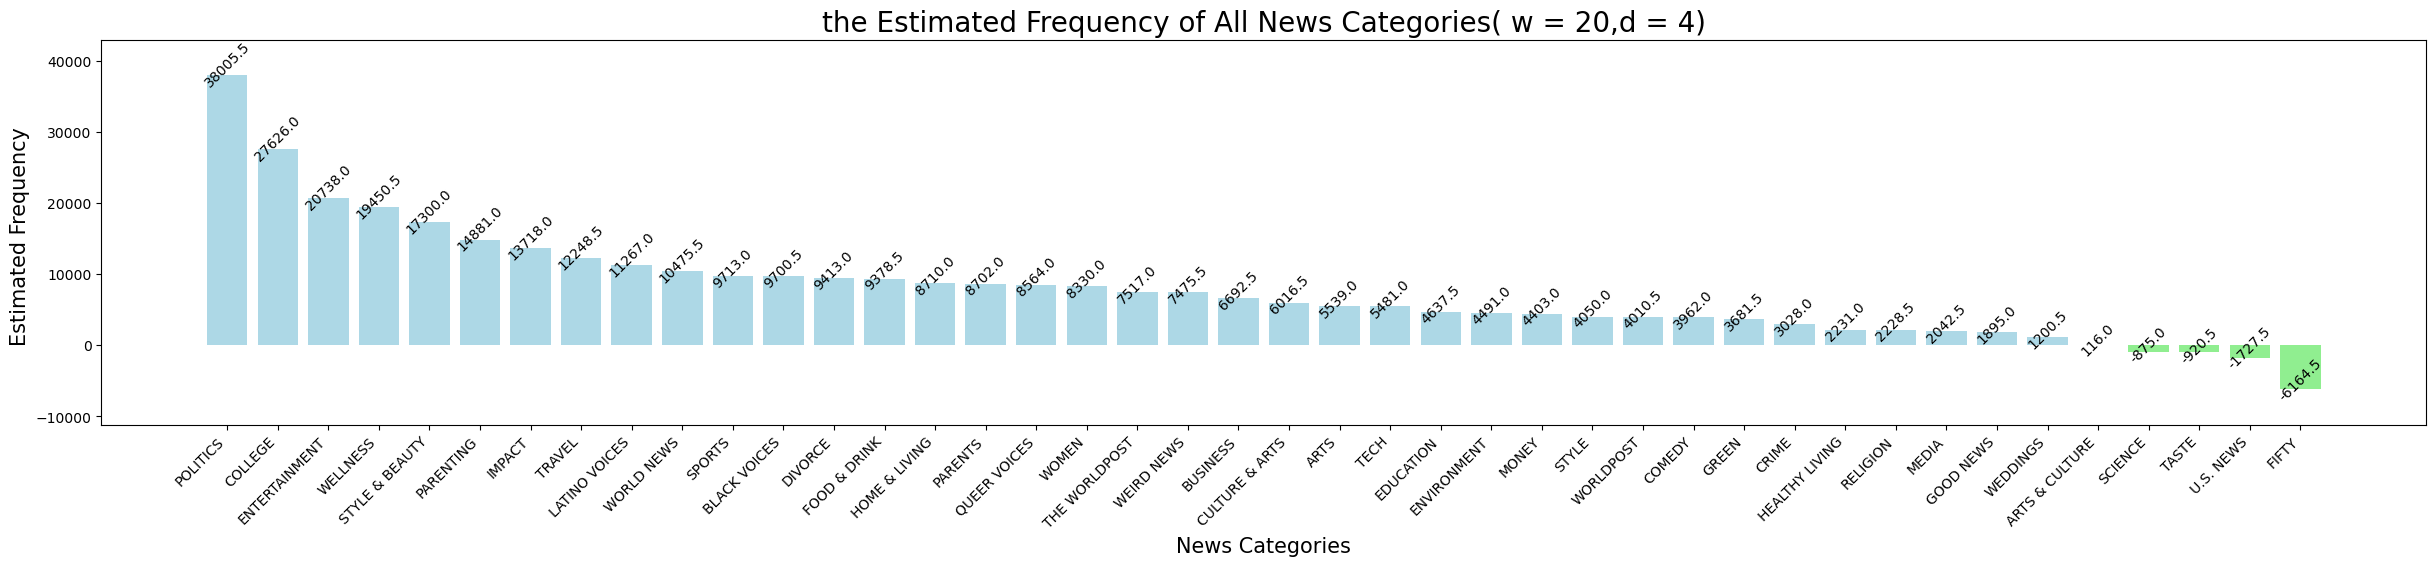

In [31]:
fig, ax = plt.subplots(figsize=(30, 5))

plt.xticks(rotation=45, ha='right') 

categories = list(Sorted_Cou_Ske_fre.keys())
frequencies = list(Sorted_Cou_Ske_fre.values())

#positive number in lightblue, while negative number in lightgreen
colors = ['lightblue' if v >= 0 else 'lightgreen' for v in frequencies]
plt.bar(categories, frequencies, color = colors)

plt.ylim(min(frequencies)-5000, max(frequencies)+5000)

plt.xlabel('News Categories',size = 15)
plt.ylabel('Estimated Frequency ',size = 15)
plt.title('the Estimated Frequency of All News Categories( w = 20,d = 4)',size = 20)

for i, value in enumerate(frequencies):
    plt.text(i, value-2000, str(frequencies[i]), ha='center', va='bottom',rotation = 45)

plt.show()

##### Summary
The above plot shows the estimated frequency by count sketch approach. The estimated frequency has both positive and negative values due to the hash function and sign function generated randomly. Under the current setting, politics has the highest estimated frequency, while the weird news has the lowest.

#### (B) Compare the estimated frequency of all categories with their true frequencies from Q1(B). In particular, please provide a curve plot for all categories, displaying (1) the estimated frequencies by the Count Sketch Algorithm in descending order with ($w$ = 20, $d$ = 4), and (2) their corresponding true frequencies. (**Note**: $x$-axis as categories, $y$-axis as frequency, and two distributions.)

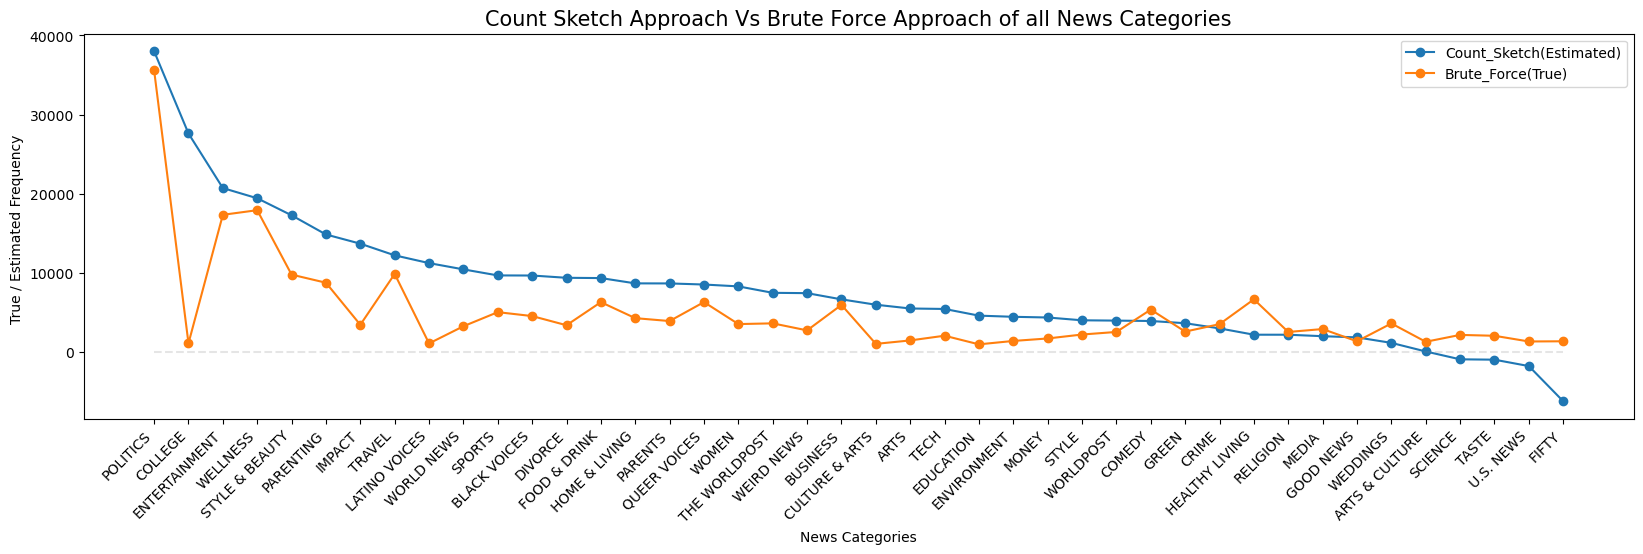

In [32]:
fig, ax = plt.subplots(figsize=(20, 5))

categories_SK = list(Sorted_Cou_Ske_fre.keys())
x_indices = np.arange(len(categories_SK))

CS = list(Sorted_Cou_Ske_fre.values())
BF = [Sorted_fre_dic[categories] for categories in categories_SK]

plt.xticks(rotation = 45, ha = 'right')
plt.xticks(x_indices, categories_SK)

plt.plot(categories_SK,CS, marker ='o',label = "Count_Sketch(Estimated)")
plt.plot(categories_SK,BF, marker ='o',label = "Brute_Force(True)")
plt.plot(categories_SK, np.zeros(len(categories_SK)), color = "grey", alpha = 0.2, linestyle='--')

plt.xlabel('News Categories')
plt.ylabel('True / Estimated Frequency ')
plt.title('Count Sketch Approach Vs Brute Force Approach of all News Categories',size = 15)

plt.legend()
plt.show()

##### Summary
The above plot shows all of the news categories' true and estimated frequency. Under the current setting, the number of positive estimated frequencies is slightly higher than the number of negative frequencies. Some categories are overcounted than true frequency, while some categories are undercounted.


#### (C) Investigate the impact of the bucket size $ w ∈ \{10, 20, 30, 40\}$ to the absolute error across all categories by the Count Sketch Algorithm. Please provide curve plot across varying bucket size $w$, with $w$ as the $x$-axis and absolute error of each news category $(c_i)$ as the $y$-axis (Eq.1). Please comment how you would specify the value of $w$ to achieve more accurate estimations.

In [33]:
cs_fre_10= Count_Sketch(news_indices, 10, 4)
Cou_Ske_fre_10 = dict(zip(list(indices_dic.keys()),cs_fre_10))

cs_fre_20= Count_Sketch(news_indices, 20, 4)
Cou_Ske_fre_20 = dict(zip(list(indices_dic.keys()),cs_fre_20))

cs_fre_30= Count_Sketch(news_indices, 30, 4)
Cou_Ske_fre_30= dict(zip(list(indices_dic.keys()),cs_fre_30))

cs_fre_40= Count_Sketch(news_indices, 40, 4)
Cou_Ske_fre_40 = dict(zip(list(indices_dic.keys()),cs_fre_40))

err_10=Abosolute_Error(fre_dic,Cou_Ske_fre_10)
err_20=Abosolute_Error(fre_dic,Cou_Ske_fre_20)
err_30=Abosolute_Error(fre_dic,Cou_Ske_fre_30)
err_40=Abosolute_Error(fre_dic,Cou_Ske_fre_40)

Generated Prime Number are: 645582103 and 839474551.


10 is the bucket size of Count Sketch Approach.


4 independent hash function(h) will be generated.

((5063023 * x + 247793065) mod 645582103) mod 10
((11677024 * x + 263085386) mod 645582103) mod 10
((231476623 * x + 60248466) mod 645582103) mod 10
((251442299 * x + 622937283) mod 645582103) mod 10

4 independent 2-wise sign function(s) will be generated.

((472451911 * x + 350544844) mod 839474551) mod 2
((718599014 * x + 214150129) mod 839474551) mod 2
((374584142 * x + 765623232) mod 839474551) mod 2
((784692400 * x + 637426377) mod 839474551) mod 2

We are generating the hash table...

The hash table has been generated successfully.

The estimated frequency for all of the items has been generated successfully.

Generated Prime Number are: 1000312717 and 327141799.


20 is the bucket size of Count Sketch Approach.


4 independent hash function(h) will be generated.

((439545738 * x + 216439938) mod 1000312717) mod 20
((94103419

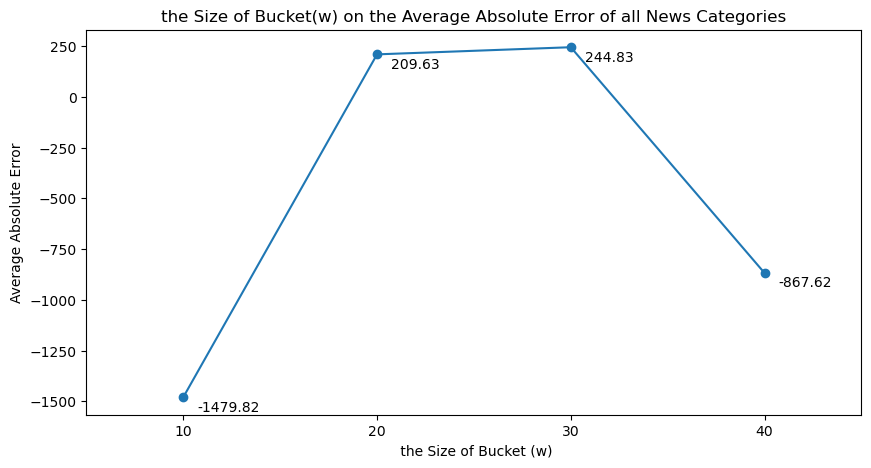

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
size = [10, 20, 30, 40] 
error_2 = [err_10, err_20, err_30, err_40]

plt.plot(size, error_2, marker ='o')
plt.xticks(size)
plt.xlim(5,45)

for i, (xi,yi) in enumerate(zip(size, error_2)):
    plt.annotate(f'{yi:.2f}', (xi, yi),
                 textcoords="offset points", xytext=(10,-10), ha='left')

plt.xlabel(' the Size of Bucket (w)')
plt.ylabel('Average Absolute Error')
plt.title('the Size of Bucket(w) on the Average Absolute Error of all News Categories')
plt.show()

##### Summary
The above plot shows the average absolute error is impacted by the bucket size w. While the bucket size is 10 and 30, the count sketch approaches are overcounted. While bucket size 20  and 40,the count sketch approaches are undercounted. However, bucket size 20 has the closest average absolute error of 0. **Hence, the Bucket size equals to 20 will be selected as the best accuracy group.**

#### (D) Investigate the impact of the number of hash functions $d ∈ \{2, 4, 8, 16\}$ to the absolute error across all categories by the Count Sketch Algorithm. Please provide curve plot across varying number of hash functions $d$, with $d$ as the $x$-axis and absolute error of each news category $(c_i)$ as the $y$-axis (Eq.1). Please comment how you would specify the value of d to achieve more accurate estimations. 

In [35]:
cs_fre_2= Count_Sketch(news_indices, 20, 2)
Cou_Ske_fre_2 = dict(zip(list(indices_dic.keys()),cs_fre_2))

cs_fre_4= Count_Sketch(news_indices, 20, 4)
Cou_Ske_fre_4 = dict(zip(list(indices_dic.keys()),cs_fre_4))

cs_fre_8= Count_Sketch(news_indices, 20, 8)
Cou_Ske_fre_8 = dict(zip(list(indices_dic.keys()),cs_fre_8))

cs_fre_16= Count_Sketch(news_indices, 20, 16)
Cou_Ske_fre_16 = dict(zip(list(indices_dic.keys()),cs_fre_16))

cs_fre_32= Count_Sketch(news_indices, 20, 32)
Cou_Ske_fre_32 = dict(zip(list(indices_dic.keys()),cs_fre_32))

err_2 = Abosolute_Error(fre_dic,Cou_Ske_fre_2)
err_4 = Abosolute_Error(fre_dic,Cou_Ske_fre_4)
err_8 = Abosolute_Error(fre_dic,Cou_Ske_fre_8)
err_16 = Abosolute_Error(fre_dic,Cou_Ske_fre_16)
err_32 = Abosolute_Error(fre_dic,Cou_Ske_fre_32)

Generated Prime Number are: 818115943 and 476630981.


20 is the bucket size of Count Sketch Approach.


2 independent hash function(h) will be generated.

((318940862 * x + 48049622) mod 818115943) mod 20
((161011696 * x + 391886490) mod 818115943) mod 20

2 independent 2-wise sign function(s) will be generated.

((282700623 * x + 461490439) mod 476630981) mod 2
((354601734 * x + 185302667) mod 476630981) mod 2

We are generating the hash table...

The hash table has been generated successfully.

The estimated frequency for all of the items has been generated successfully.

Generated Prime Number are: 879090781 and 630869929.


20 is the bucket size of Count Sketch Approach.


4 independent hash function(h) will be generated.

((696938910 * x + 13274024) mod 879090781) mod 20
((59372581 * x + 258528220) mod 879090781) mod 20
((570987986 * x + 731155166) mod 879090781) mod 20
((427025331 * x + 690944625) mod 879090781) mod 20

4 independent 2-wise sign function(s) will be generated.

(

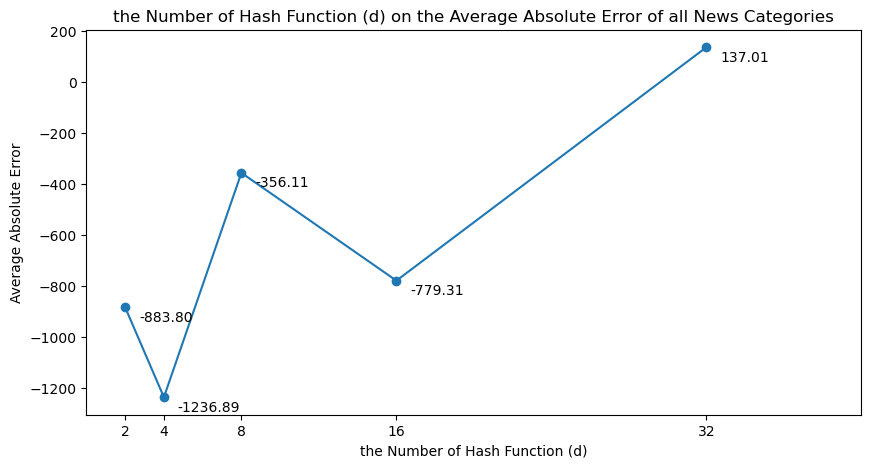

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
size = [2, 4, 8, 16, 32] 
error_3 = [err_2, err_4, err_8, err_16, err_32]

plt.plot(size, error_3, marker ='o')
plt.xticks(size)
plt.xlim(0,40)

for i, (xi,yi) in enumerate(zip(size, error_3)):
    plt.annotate(f'{yi:.2f}', (xi, yi),
                 textcoords="offset points", xytext=(10,-10), ha='left')

plt.xlabel('the Number of Hash Function (d)')
plt.ylabel('Average Absolute Error')
plt.title('the Number of Hash Function (d) on the Average Absolute Error of all News Categories')
plt.show()

### Section 4: Countmin Sketch Approach and Performance Evaluation


#### (A) Implement Countmin Sketch Algorithm to find the most frequent categories. Please report the plot of the estimated frequencies in descending order to observe the approximation skewness with a summary size of ($w$ = 20,$d$ = 4).

In [37]:
#convert the category into index by alphabetical order
cates = sorted(list(set(news_cate)))
indices = list(range(len(cates)))

#create the dictionary, the key is category and the value is index 
indices_dic = {string: index for string, index in zip(cates, indices)}

In [38]:
indices_dic

{'ARTS': 0,
 'ARTS & CULTURE': 1,
 'BLACK VOICES': 2,
 'BUSINESS': 3,
 'COLLEGE': 4,
 'COMEDY': 5,
 'CRIME': 6,
 'CULTURE & ARTS': 7,
 'DIVORCE': 8,
 'EDUCATION': 9,
 'ENTERTAINMENT': 10,
 'ENVIRONMENT': 11,
 'FIFTY': 12,
 'FOOD & DRINK': 13,
 'GOOD NEWS': 14,
 'GREEN': 15,
 'HEALTHY LIVING': 16,
 'HOME & LIVING': 17,
 'IMPACT': 18,
 'LATINO VOICES': 19,
 'MEDIA': 20,
 'MONEY': 21,
 'PARENTING': 22,
 'PARENTS': 23,
 'POLITICS': 24,
 'QUEER VOICES': 25,
 'RELIGION': 26,
 'SCIENCE': 27,
 'SPORTS': 28,
 'STYLE': 29,
 'STYLE & BEAUTY': 30,
 'TASTE': 31,
 'TECH': 32,
 'THE WORLDPOST': 33,
 'TRAVEL': 34,
 'U.S. NEWS': 35,
 'WEDDINGS': 36,
 'WEIRD NEWS': 37,
 'WELLNESS': 38,
 'WOMEN': 39,
 'WORLD NEWS': 40,
 'WORLDPOST': 41}

In [39]:
#get the category dictionary index
news_indices = [indices_dic[item] for item in news_cate]

#estimated frequency calculated by count sketch approach
cms_fre= CountMin_Sketch(news_indices, 20, 4)

#connect the category with corresponding estimated frequency
Coumin_Ske_fre = dict(zip(list(indices_dic.keys()),cms_fre))

#sort the etmimated frequency by descending order
Sorted_Coumin_Ske_fre = dict(sorted(Coumin_Ske_fre.items(), key=lambda item: item[1],reverse = True))

Generated Prime Number are: 812155117 .


20 is the bucket size of Count Sketch Approach.


4 independent hash function(h) will be generated.

((740647275 * x + 461805839) mod 812155117) mod 20
((662904754 * x + 59611633) mod 812155117) mod 20
((650881317 * x + 95585675) mod 812155117) mod 20
((226596214 * x + 73175191) mod 812155117) mod 20

We are generating the hash table...

The hash table has been generated successfully.


The estimated frequency for all of the items has been generated successfully.




In [40]:
Sorted_Coumin_Ske_fre

{'POLITICS': 38181.0,
 'ENTERTAINMENT': 19568.0,
 'WELLNESS': 19389.0,
 'PARENTING': 14191.0,
 'COMEDY': 13776.0,
 'FOOD & DRINK': 12687.0,
 'TRAVEL': 11344.0,
 'CULTURE & ARTS': 10888.0,
 'STYLE & BEAUTY': 10888.0,
 'WORLD NEWS': 10816.0,
 'HEALTHY LIVING': 10266.0,
 'BUSINESS': 8936.0,
 'CRIME': 7517.0,
 'BLACK VOICES': 7360.0,
 'WEIRD NEWS': 7360.0,
 'HOME & LIVING': 6574.0,
 'QUEER VOICES': 6347.0,
 'ARTS & CULTURE': 6200.0,
 'IMPACT': 6200.0,
 'PARENTS': 5464.0,
 'THE WORLDPOST': 5420.0,
 'SPORTS': 5077.0,
 'MEDIA': 5048.0,
 'DIVORCE': 4803.0,
 'GREEN': 4726.0,
 'TECH': 4726.0,
 'WEDDINGS': 4667.0,
 'STYLE': 3655.0,
 'WOMEN': 3572.0,
 'GOOD NEWS': 3494.0,
 'TASTE': 3494.0,
 'SCIENCE': 3350.0,
 'COLLEGE': 2900.0,
 'MONEY': 2900.0,
 'FIFTY': 2778.0,
 'U.S. NEWS': 2778.0,
 'WORLDPOST': 2579.0,
 'RELIGION': 2577.0,
 'ARTS': 1509.0,
 'ENVIRONMENT': 1444.0,
 'LATINO VOICES': 1130.0,
 'EDUCATION': 1014.0}

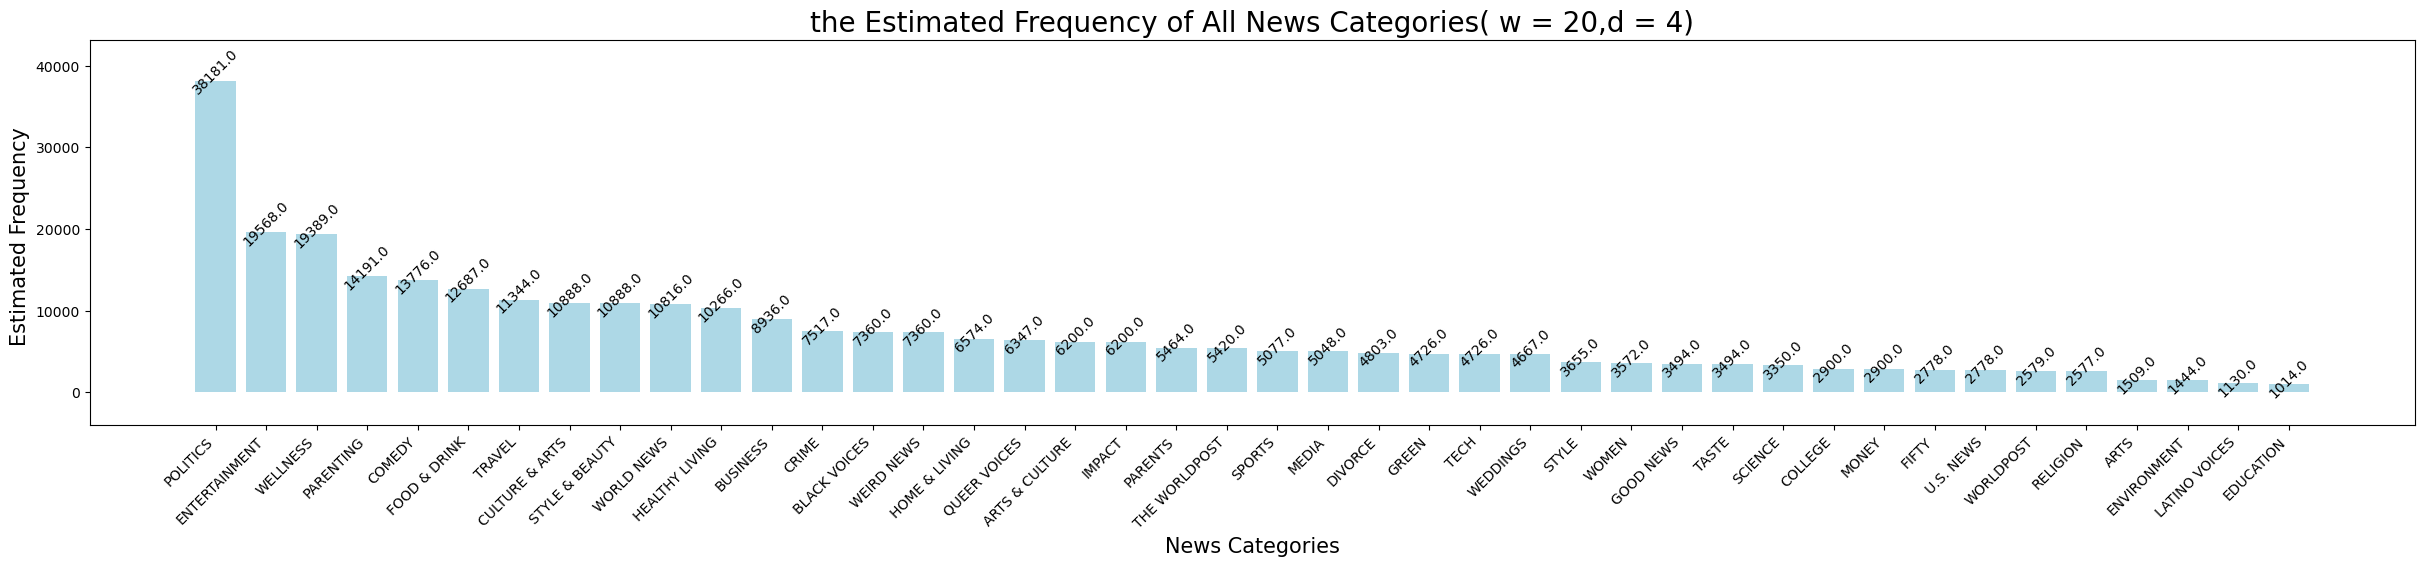

In [41]:
fig, ax = plt.subplots(figsize=(30, 5))

plt.xticks(rotation=45, ha='right') 

categories = list(Sorted_Coumin_Ske_fre.keys())
frequencies = list(Sorted_Coumin_Ske_fre.values())

#positive number in lightblue, while negative number in lightgreen
colors = ['lightblue' if v >= 0 else 'lightgreen' for v in frequencies]
plt.bar(categories, frequencies, color = colors)

plt.ylim(min(frequencies)-5000, max(frequencies)+5000)

plt.xlabel('News Categories',size = 15)
plt.ylabel('Estimated Frequency ',size = 15)
plt.title('the Estimated Frequency of All News Categories( w = 20,d = 4)',size = 20)

for i, value in enumerate(frequencies):
    plt.text(i, value-2000, str(frequencies[i]), ha='center', va='bottom',rotation = 45)

plt.show()

##### Summary
The above plot shows the estimated frequency by count sketch approach. The estimated frequency has both positive and negative values due to the hash function and sign function generated randomly. Under the current setting, politics has the highest estimated frequency, while the weird news has the lowest.

#### (B) Compare the estimated frequency of all categories with their true frequencies from Q1(B). In particular, please provide a curve plot for all categories, displaying (1) the estimated frequencies by the CountMin Sketch Algorithm in descending order with ($w$ = 20, $d$ = 4), and (2) their corresponding true frequencies. (**Note**: $x$-axis as categories, $y$-axis as frequency, and two distributions.)

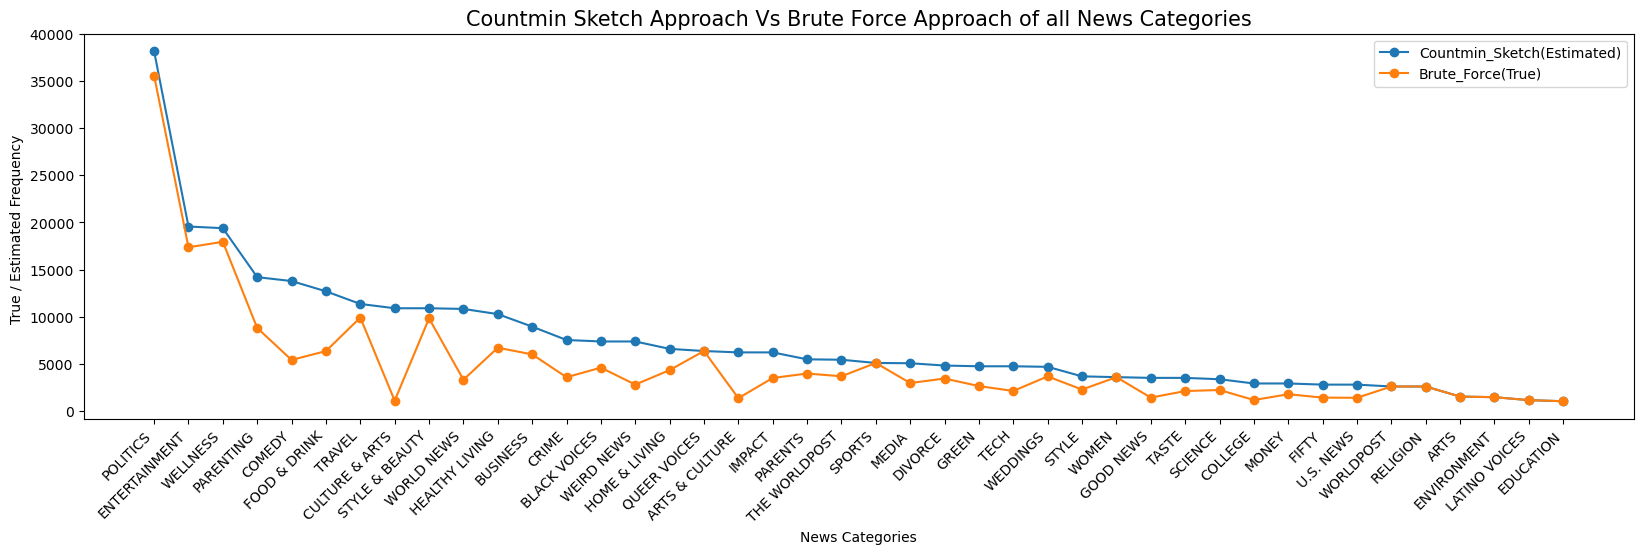

In [42]:
fig, ax = plt.subplots(figsize=(20, 5))

categories_SK = list(Sorted_Coumin_Ske_fre.keys())
x_indices = np.arange(len(categories_SK))

CMS = list(Sorted_Coumin_Ske_fre.values())
BF = [Sorted_fre_dic[categories] for categories in categories_SK]

plt.xticks(rotation = 45, ha = 'right')
plt.xticks(x_indices, categories_SK)

plt.plot(categories_SK,CMS, marker ='o',label = "Countmin_Sketch(Estimated)")
plt.plot(categories_SK,BF, marker ='o',label = "Brute_Force(True)")

plt.xlabel('News Categories')
plt.ylabel('True / Estimated Frequency ')
plt.title('Countmin Sketch Approach Vs Brute Force Approach of all News Categories',size = 15)

plt.legend()
plt.show()

##### Summary
The above plot shows all of the news categories' true and estimated frequency. Under the current setting, the number of positive estimated frequencies is slightly higher than the number of negative frequencies. Some categories are overcounted than true frequency, while some categories are undercounted.


#### (C) Investigate the impact of the bucket size $ w ∈ \{10, 20, 30, 40\}$ to the absolute error across all categories by the CountMin Sketch Algorithm. Please provide curve plot across varying bucket size $w$, with $w$ as the $x$-axis and absolute error of each news category $(c_i)$ as the $y$-axis (Eq.1). Please comment how you would specify the value of $w$ to achieve more accurate estimations.

In [43]:
cms_fre_10= CountMin_Sketch(news_indices, 10, 4)
Coumin_Ske_fre_10 = dict(zip(list(indices_dic.keys()),cms_fre_10))

cms_fre_20= CountMin_Sketch(news_indices, 20, 4)
Coumin_Ske_fre_20 = dict(zip(list(indices_dic.keys()),cms_fre_20))

cms_fre_30= CountMin_Sketch(news_indices, 30, 4)
Coumin_Ske_fre_30= dict(zip(list(indices_dic.keys()),cms_fre_30))

cms_fre_40= CountMin_Sketch(news_indices, 40, 4)
Coumin_Ske_fre_40 = dict(zip(list(indices_dic.keys()),cms_fre_40))

err_10=Abosolute_Error(fre_dic,Coumin_Ske_fre_10)
err_20=Abosolute_Error(fre_dic,Coumin_Ske_fre_20)
err_30=Abosolute_Error(fre_dic,Coumin_Ske_fre_30)
err_40=Abosolute_Error(fre_dic,Coumin_Ske_fre_40)

Generated Prime Number are: 8553569 .


10 is the bucket size of Count Sketch Approach.


4 independent hash function(h) will be generated.

((2805465 * x + 6395893) mod 8553569) mod 10
((5841607 * x + 1543549) mod 8553569) mod 10
((7252402 * x + 3754306) mod 8553569) mod 10
((8382442 * x + 2459824) mod 8553569) mod 10

We are generating the hash table...

The hash table has been generated successfully.


The estimated frequency for all of the items has been generated successfully.


Generated Prime Number are: 406426693 .


20 is the bucket size of Count Sketch Approach.


4 independent hash function(h) will be generated.

((337049253 * x + 30207627) mod 406426693) mod 20
((321596041 * x + 168027378) mod 406426693) mod 20
((12582336 * x + 153405591) mod 406426693) mod 20
((130925665 * x + 20624007) mod 406426693) mod 20

We are generating the hash table...

The hash table has been generated successfully.


The estimated frequency for all of the items has been generated successfully.



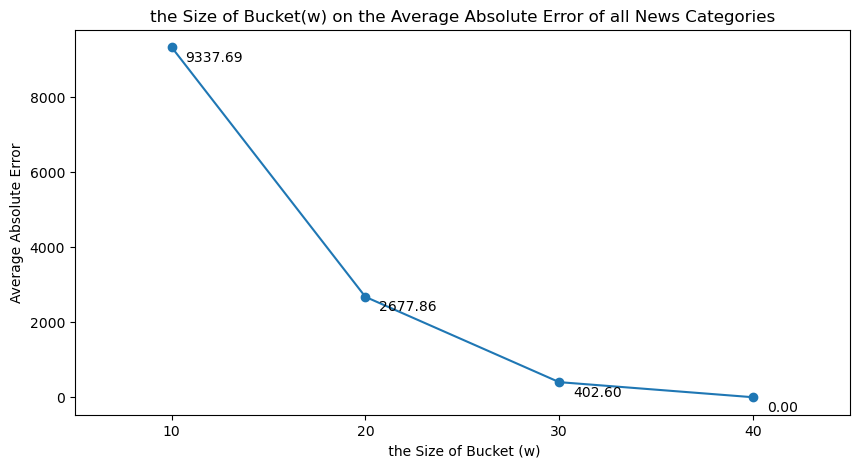

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))
size = [10, 20, 30, 40] 
error_2 = [err_10, err_20, err_30, err_40]

plt.plot(size, error_2, marker ='o')
plt.xticks(size)
plt.xlim(5,45)

for i, (xi,yi) in enumerate(zip(size, error_2)):
    plt.annotate(f'{yi:.2f}', (xi, yi),
                 textcoords="offset points", xytext=(10,-10), ha='left')

plt.xlabel(' the Size of Bucket (w)')
plt.ylabel('Average Absolute Error')
plt.title('the Size of Bucket(w) on the Average Absolute Error of all News Categories')
plt.show()

##### Summary
The above plot shows the average absolute error is impacted by the bucket size w. While the bucket size is 10 and 30, the count sketch approaches are overcounted. While bucket size 20  and 40,the count sketch approaches are undercounted. However, bucket size 20 has the closest average absolute error of 0. **Hence, the Bucket size equals to 20 will be selected as the best accuracy group.**

#### (D) Investigate the impact of the number of hash functions $d ∈ \{2, 4, 8, 16\}$ to the absolute error across all categories by the Countmin Sketch Algorithm. Please provide curve plot across varying number of hash functions $d$, with $d$ as the $x$-axis and absolute error of each news category $(c_i)$ as the $y$-axis (Eq.1). Please comment how you would specify the value of d to achieve more accurate estimations. 

In [45]:
cms_fre_2= CountMin_Sketch(news_indices, 20, 2)
Coumin_Ske_fre_2 = dict(zip(list(indices_dic.keys()),cms_fre_2))

cms_fre_4= CountMin_Sketch(news_indices, 20, 4)
Coumin_Ske_fre_4 = dict(zip(list(indices_dic.keys()),cms_fre_4))

cms_fre_8= CountMin_Sketch(news_indices, 20, 8)
Coumin_Ske_fre_8 = dict(zip(list(indices_dic.keys()),cms_fre_8))

cms_fre_16= CountMin_Sketch(news_indices, 20, 16)
Coumin_Ske_fre_16 = dict(zip(list(indices_dic.keys()),cms_fre_16))

cms_fre_32= CountMin_Sketch(news_indices, 20, 32)
Coumin_Ske_fre_32 = dict(zip(list(indices_dic.keys()),cms_fre_32))

err_2 = Abosolute_Error(fre_dic,Coumin_Ske_fre_2)
err_4 = Abosolute_Error(fre_dic,Coumin_Ske_fre_4)
err_8 = Abosolute_Error(fre_dic,Coumin_Ske_fre_8)
err_16 = Abosolute_Error(fre_dic,Coumin_Ske_fre_16)
err_32 = Abosolute_Error(fre_dic,Coumin_Ske_fre_32)

Generated Prime Number are: 412265551 .


20 is the bucket size of Count Sketch Approach.


2 independent hash function(h) will be generated.

((262280442 * x + 65017721) mod 412265551) mod 20
((207034926 * x + 263754950) mod 412265551) mod 20

We are generating the hash table...

The hash table has been generated successfully.


The estimated frequency for all of the items has been generated successfully.


Generated Prime Number are: 256447067 .


20 is the bucket size of Count Sketch Approach.


4 independent hash function(h) will be generated.

((211482962 * x + 56166313) mod 256447067) mod 20
((68266110 * x + 219518253) mod 256447067) mod 20
((173412062 * x + 84997974) mod 256447067) mod 20
((60931820 * x + 39726536) mod 256447067) mod 20

We are generating the hash table...

The hash table has been generated successfully.


The estimated frequency for all of the items has been generated successfully.


Generated Prime Number are: 380737171 .


20 is the bucket size of Count Sketc

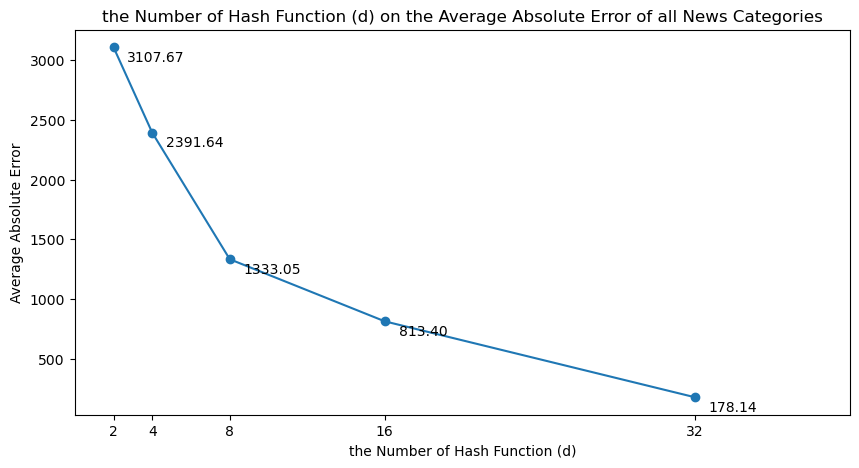

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
size = [2, 4, 8, 16, 32] 
error_3 = [err_2, err_4, err_8, err_16, err_32]

plt.plot(size, error_3, marker ='o')
plt.xticks(size)
plt.xlim(0,40)

for i, (xi,yi) in enumerate(zip(size, error_3)):
    plt.annotate(f'{yi:.2f}', (xi, yi),
                 textcoords="offset points", xytext=(10,-10), ha='left')

plt.xlabel('the Number of Hash Function (d)')
plt.ylabel('Average Absolute Error')
plt.title('the Number of Hash Function (d) on the Average Absolute Error of all News Categories')
plt.show()